#(1.) Mean Squared Error

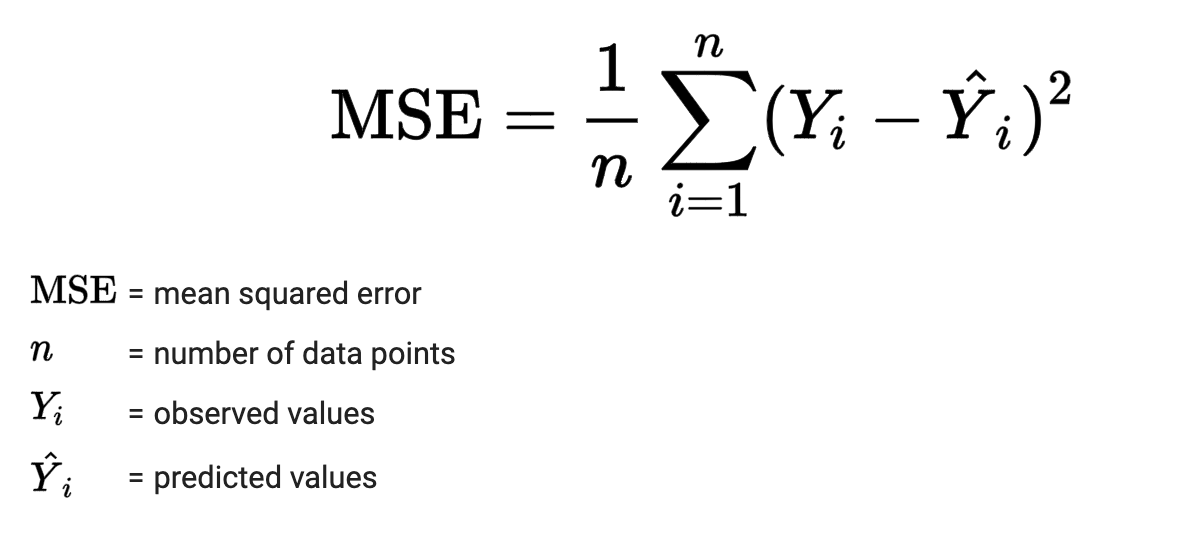

เอาไว้ใช้หาค่า loss, Error เหมาะกับงานประเภท Regression แต่ก็ใช้กับ Classification ได้เหมือนกัน

In [2]:
from sklearn.metrics import mean_squared_error
y_true = [0, 0, 1, 1]     # ค่า y จากข้อมูลของจริง
y_pred = [0, 0, 0, 0]    # ค่า y สมมติว่าได้จากการทำงานด้วย Model ขณะกำลัง Train

# MSE = (0 + 0 + 1**2 + 1**2) / 4 = 2/4 = 0.5
mean_squared_error(y_true, y_pred)

0.5

- กรณีทำนายตรงเป๊ะ

In [3]:
y_true = [0, 0, 1, 1]
y_pred = [0, 0, 1, 1]
mean_squared_error(y_true, y_pred)

0.0

- ลองค่าอื่นๆ

In [4]:
y_true = [0, 0, 1, 1, 2.5, 2.4]
y_pred = [0, 0, 0, 1, 0.4, 1.1]
mean_squared_error(y_true, y_pred)

1.1833333333333333

ทำนายถูกเยอะ ค่า loss ก็น้อย, ทำนายถูกน้อย ค่า loss ก็เยอะ

#(2.) หาค่า loss ด้วย Binary Cross-entropy

ใช้กับงาน Classification ที่มีการแบ่งคลาสออกเป็น 2 คลาส

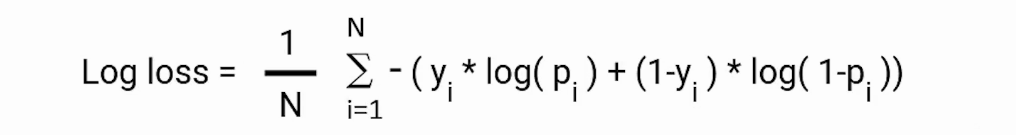

ให้ p แทนความน่าจะเป็นที่ทำนายว่าเป็นคลาส 1 (Yes)

1 - p แทนความน่าจะเป็นที่ทำนายว่าเป็นคลาส 0 (No)

- ให้ y_pred ต่างจาก y_true 1 จุด

In [ ]:
import numpy as np
import tensorflow as tf

y_true = [0, 0, 1, 1]     # สมมติว่านี่คือ label, target, actual class ของข้อมูลจริง
y_pred = [0, 0, 1, 0]    # ค่าที่ predicted เป็นจำนวนเต็มหรือทศนิยมก็ได้

y_pred = np.array(y_pred).astype('float')   # convert to float
bce = tf.keras.losses.BinaryCrossentropy()

bce(y_true, y_pred).numpy()     # คำนวณค่า Binary Cross-entropy

3.8562371175995938

- ให้ y_pred ต่างจาก y_true 2 จุด

In [ ]:
y_true = [0, 0, 1, 1]     # สมมติว่านี่คือ label, target, actual class ของข้อมูลจริง
y_pred = [0, 0, 0, 0]    # ค่าที่ predicted เป็นจำนวนเต็มหรือทศนิยมก็ได้

y_pred = np.array(y_pred).astype('float')   # convert to float
bce = tf.keras.losses.BinaryCrossentropy()

bce(y_true, y_pred).numpy()     # คำนวณค่า Binary Cross-entropy

7.7124742351991875

- ให้ y_pred ต่างจาก y_true 4 จุด

In [ ]:
y_true = [0, 0, 1, 1]     # สมมติว่านี่คือ label, target, actual class ของข้อมูลจริง
y_pred = [1, 1, 0, 0]    # ค่าที่ predicted เป็นจำนวนเต็มหรือทศนิยมก็ได้

y_pred = np.array(y_pred).astype('float')   # convert to float
bce = tf.keras.losses.BinaryCrossentropy()

bce(y_true, y_pred).numpy()     # คำนวณค่า Binary Cross-entropy

15.424948470529964

- ให้ y_pred ไม่ต่างจาก y_true เลย

In [ ]:
y_true = [0, 0, 1, 1]     # สมมติว่านี่คือ label, target, actual class ของข้อมูลจริง
y_pred = [0, 0, 1, 1]    # ค่าที่ predicted เป็นจำนวนเต็มหรือทศนิยมก็ได้

y_pred = np.array(y_pred).astype('float')   # convert to float
bce = tf.keras.losses.BinaryCrossentropy()

bce(y_true, y_pred).numpy()     # คำนวณค่า Binary Cross-entropy

0.0

ถ้า y_pred ต่างจาก y_true มาก ก็ได้ค่า loss มากเช่นกัน

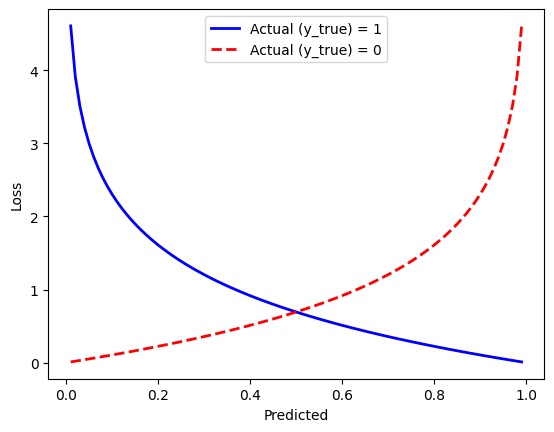

In [ ]:
import matplotlib.pyplot as plt

def cross_entropy_loss(yHat, y): # คำนวณค่า Cross-entropy เทียบ y_pred (yHat) กับ y
  if y==1:
    return -np.log(yHat)
  else:
    return -np.log(1 - yHat)
  # yHat คือ ค่าที่ Model คำนวณได้,  y คือค่าจาก actual label/y_true

# สร้างข้อมูลช่วง 0.1-0.99 เพื่อป้อนให้ฟังก์ชัน (ไม่ใช้ 0 เนื่องจากป้องกัน Log Error)
y_pred = np.arange(0.01, 0.999, 0.01)
cost_1 = cross_entropy_loss(y_pred, 1)    # หาค่าเทียบกับ y_true = 1
cost_0 = cross_entropy_loss(y_pred, 0)    # เทียบกับ y_true = 0

plt.plot(y_pred, cost_1, label='Actual (y_true) = 1', c='b', ls='-', lw=2)
plt.plot(y_pred, cost_0, label='Actual (y_true) = 0', c='r', ls='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

- เส้นสีน้ำเงิน คือ y_true=1: เมื่อค่า y_pred ที่ได้จาก Model มีค่าเข้าใกล้ 1 ค่า Loss จะน้อยลง
- เส้นสีแดง คือ y_true=0: เมื่อค่า y_pred ที่ได้จาก Model มีค่าเข้าใกล้ 0 ค่า Loss จะน้อยลง
- ข้อสังเกต ความสัมพันธ์จะไม่เป็นเส้นตรง ซึ่งคุณสมบัตินี้เหมาะสำหรับการนำไปใช้ Optimizer

# (3.) Sparse Categorical Cross-entropy

ใช้สำหรับงาน Classification ที่มีจำนวนคลาสมากกว่า 2 คลาส แต่ไม่ต้องทำ One-hot encoding เหมือน Categorical Cross-entropy ในบทก่อนหน้านี้

โดย Output layer ต้องกำหนดให้ใช้ Activation Function เป็น Softmax การใช้วิธีนี้จะช่วยลดการใช้ทรัพยากรหน่วยความจำลงได้ ในงานที่มีคลาสจำนวนมาก(Multi-class Classification)

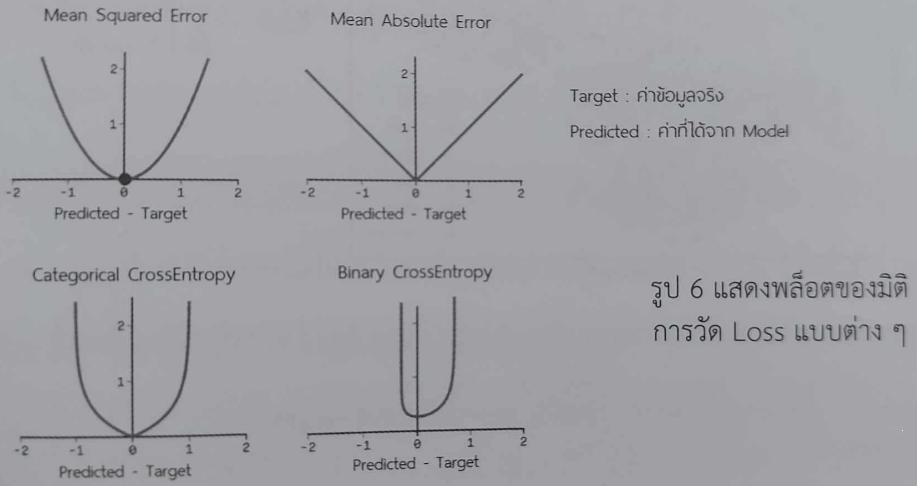

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

X, y = make_blobs(n_samples=1000,
                  centers=5,
                  n_features=2,
                  cluster_std=1.1,
                  random_state=1)
# สร้าง 1000 ข้อมูล 5 กลุ่ม แต่ละกลุ่มมี 2 Features
X_df = pd.DataFrame(X, columns=['weight', 'height'])
y_df = pd.DataFrame(y, columns=['class'])   # y (label)
df = pd.concat([X_df, y_df], axis=1)
target_map = {0:'house', 1:'bird', 2:'fish', 3:'cat', 4:'dog'}  # ใส่กลุ่มพันธุ์สัตว์
df['class'] = df['class'].map(target_map)

df.sample(5, random_state=100)

,weight,height,class
249,-11.889046,-3.890515,bird
353,-9.501477,-4.717762,bird
537,-3.277917,1.611778,dog
424,-9.297471,-2.403170,bird
564,-2.897847,0.377424,dog


ตัวอย่างข้อมูล Class/target เป็น object/string ต้องทำการเข้ารหัสเปลี่ยนเป็นตัวเลขดังนี้

In [2]:
class_names, y = np.unique(df['class'], return_inverse=True)
print(class_names)
print(y[:20])

['bird' 'cat' 'dog' 'fish' 'house']
[3 0 1 1 2 2 3 2 2 2 2 4 4 1 0 1 4 2 2 0]


สร้างข้อมูล X สำหรับ Feature แล้วปรับสเกลด้วย Standard Scaler

In [3]:
X = df.drop('class', axis=1)
X.head()

,weight,height
0,-7.253467,-7.947597
1,-12.447536,-5.822616
2,-5.973586,-3.275877
3,-5.310976,-2.953204
4,-1.860408,1.477063


In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:4]

array([[-0.5595291 , -1.35408313],
       [-2.10518858, -0.87283448],
       [-0.17865988, -0.29606987],
       [ 0.0185207 , -0.22299352]])

แบ่งข้อมูลสำหรับ Train และ Test จากนั้นสร้าง Model แล้วทำการ Train

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X_sc, y, test_size=0.25,
                                                   random_state=1)    # สัดส่วน 25%
X_train.shape, X_test.shape

((750, 2), (250, 2))

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()    # เริ่มสร้าง Model
model.add(Dense(100, activation='relu', input_shape=(2,)))   # เพิ่ม Layer 100 Nodes

# Output Layer 5 Node
model.add(Dense(5, activation='softmax'))   # ใช้ Softmax สำหรับ Multi-class classification

ข้อสังเกต Output Layer ต้องมี 5 Nodes ตามจำนวนคลาสของการจำแนก

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 5)                 505       
                                                                 
Total params: 805 (3.14 KB)
Trainable params: 805 (3.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


ทำการคอมไพล์ โดยใช้ sparse_categorical_crossentropy จากนั้นสั่ง Train

In [8]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=20,
                    verbose=1, validation_split=0.25) # validation แบ่ง 25%

Epoch 1/50
29/29 [==============================] - 2s 22ms/step - loss: 1.3663 - accuracy: 0.4075 - val_loss: 1.1957 - val_accuracy: 0.6117
Epoch 2/50
29/29 [==============================] - 0s 11ms/step - loss: 1.0902 - accuracy: 0.6014 - val_loss: 0.9873 - val_accuracy: 0.6596
Epoch 3/50
29/29 [==============================] - 0s 11ms/step - loss: 0.9141 - accuracy: 0.6619 - val_loss: 0.8509 - val_accuracy: 0.7074
Epoch 4/50
29/29 [==============================] - 0s 7ms/step - loss: 0.7946 - accuracy: 0.7313 - val_loss: 0.7579 - val_accuracy: 0.7500
Epoch 5/50
29/29 [==============================] - 0s 10ms/step - loss: 0.7046 - accuracy: 0.7865 - val_loss: 0.6758 - val_accuracy: 0.7872
Epoch 6/50
29/29 [==============================] - 0s 11ms/step - loss: 0.6292 - accuracy: 0.8114 - val_loss: 0.6070 - val_accuracy: 0.7979
Epoch 7/50
29/29 [==============================] - 0s 9ms/step - loss: 0.5648 - accuracy: 0.8505 - val_loss: 0.5465 - val_accuracy: 0.8457
Epoch 8/50
29/2

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss", score[0])
print("Test Accuracy", score[1])

Test loss 0.08860529959201813
Test Accuracy 0.9639999866485596


ทำการ Predict

In [28]:
y_pred = model.predict(X_test)

y_pred[:5].round(3)   # ทศนิยม 3 ตำแหน่ง

8/8 [==============================] - 0s 3ms/step


array([[0.   , 0.   , 0.002, 0.   , 0.998],
       [0.   , 0.   , 0.006, 0.   , 0.994],
       [0.   , 0.002, 0.991, 0.   , 0.007],
       [0.001, 0.924, 0.001, 0.074, 0.   ],
       [0.   , 0.   , 0.093, 0.   , 0.907]], dtype=float32)

ผลการ Predict จะได้ค่าความน่าจะเป็นของแต่ละ Node ออกมา

Node ไหนมีความน่าจะเป็นมากที่สุด หมายความว่าเป็นคลาสนั้นๆ

In [29]:
y_pred_cate = np.argmax(y_pred, axis=1)   # argmax() เลือก index ที่มีค่ามากที่สุด
y_pred_cate[:5]

array([4, 4, 2, 1, 4])

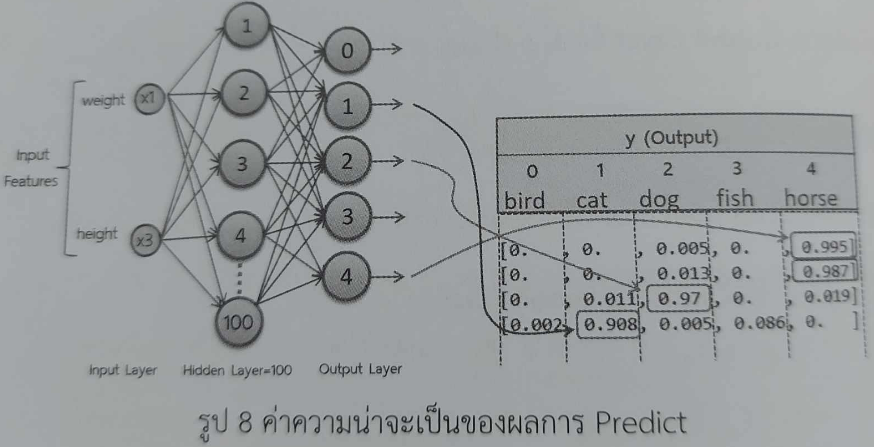

ลองพล็อตเส้นขอบเขตจำแนกคลาส ดูว่า Model มีการแบ่งกลุ่มคลาสข้อมูลเป็นอย่างไร

In [ ]:
# คลาสสำหรับแปลง output ตาราง onehot ให้เป็น int
class Onehot2Int(object):
  def __init__(self, model):
    self.model = model
  def predict(self, X):
    y_pred = self.model.predict(X)
    return np.argmax(y_pred, axis=1)

model_no_ohe = Onehot2Int(model)

9600/9600 [==============================] - 18s 2ms/step


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


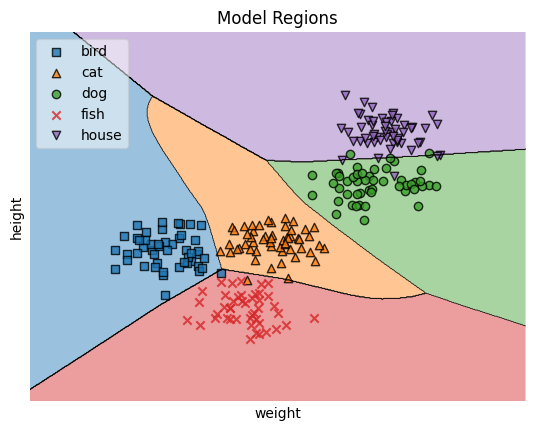

In [ ]:
from mlxtend.plotting import plot_decision_regions
ax = plot_decision_regions(X_test, y_test, clf=model_no_ohe)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)
plt.title('Model Regions')
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

สรุป กรณี multi-class classification ใช้ Sparse Categorical Cross-entropy ไม่ต้องทำ One-hot และกำหนดให้ Output Layer ใช้ Activation Function แบบ Softmax โดยไมีจำนวน Node เท่ากับจำนวนคลาส

#(4.) Gradient Descent

ใช้ Gradient Descent รูปแบบ Batch Gradient Descent โดยใช้ข้อมูลการลงทุนโฆษณาและผลกำไร

In [ ]:
import numpy as np
import matplotlib.pyplot as plt   # Ploting library
import seaborn as sns
sns.set_style('darkgrid')   # Set seaborn plotting style
np.random.seed(seed=1)  # กำหนด seed ค่าสุ่ม
x = np.random.uniform(0, 1, 12)   # uniform distribution ค่าระหว่าง 0-1

# functiion f(x) = 2*x
def f(x):
  return (2*x) + 0

noise = 0.15    # ใส่ Noise (Variance of the gaussian noise)
noise = np.random.randn(x.shape[0]) * noise

y = f(x) + noise    # สร้าง y

มีสมการ y=2x, ได้ใส่ Noise ลงไปเล็กน้อย เพื่อให้มีการกระจายค่าออกไป

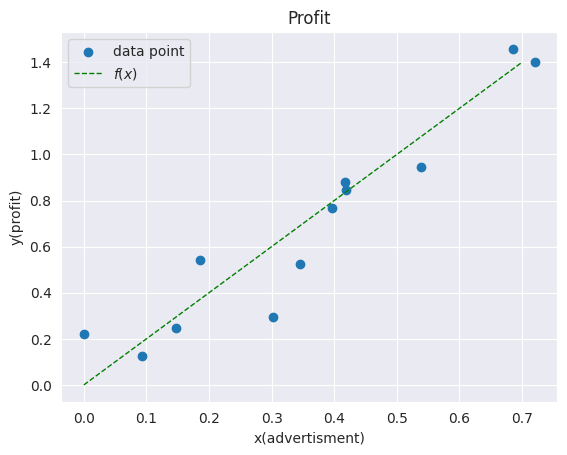

In [ ]:
plt.scatter(x, y, marker='o', label='data point')
plt.plot([0, .7], [f(0), 1.4], 'g--', lw=1, label='$f(x)$')
plt.xlabel('x(advertisment)')
plt.ylabel('y(profit)')

plt.title('Profit')
plt.legend(loc=2)
plt.show()

สร้างฟังก์ชัน output ที่ออกจาก Neuron ตัวอย่างนี้ใช้ y = (w * x) + 0 (ให้ b = 0) เพื่อให้ง่าย และ สร้างฟังก์ชันหาค่า MSE

In [ ]:
def neuron(x, w):
  # Output function ที่ออกจาก Neuron ตัวอย่างนี้ใช้ y = w*x + 0 (ให้ b = 0)
  return w*x + 0

def loss_mse(y_pred, y_true):
  return np.mean((y_true - y_pred)**2)

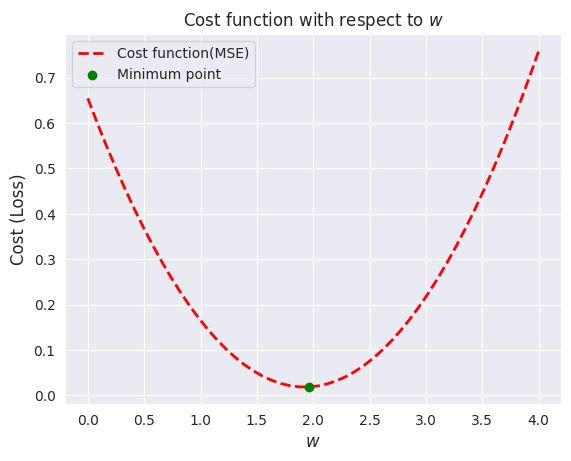

In [ ]:
# สร้าง Vector weight สำหรับพล็อตดู loss(ของ MSE ฟังก์ชัน loss_mse ที่สร้างก่อนหน้านี้)
ws = np.linspace(0, 4, num=50)    # สร้างข้อมูล 0-4 จำนวน50ข้อมูล

# ตำนวณ loss ทั้งหมด โดยดอา ws มาพล็อต
loss_ws = [loss_mse(neuron(x, w), y) for w in ws]
# ใช้แบบนี้ก็ได้ loss for each weight in ws
# loss_ws = np.vectorize(lambda w: loss_mse(neuron(x, w), y))(ws)

# หาดัชนีของค่า w ที่ทำให้ Cost function ต่ำที่สุด
min_loss_index = np.argmin(loss_ws)
# ดึงค่า w ที่ทำให้ Cost function ต่ำที่สุด
best_w = ws[min_loss_index].round(3)

# Plot
plt.plot(ws, loss_ws, 'r--', lw=2, label='Cost function(MSE)')
plt.scatter(best_w, loss_ws[min_loss_index], c='green', marker='o',
            label='Minimum point', zorder=5)
plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Cost function with respect to $w$')
plt.legend()
plt.show()

จากกราฟ ความหมายคือ ถ้า w (weight) มีค่าเท่ากับ 1 จะมี Loss MSE ประมาณ 0.16 หรือถ้า w มีค่าเท่ากับ 3 จะมี MSE ประมาณ 0.22

ถ้า w มีค่าประมาณ 1.9(ดูด้วยตาเปล่า) จะได้ค่า Loss(MSE) น้อยที่สุด(ใกล้ 0) ทดลองหาค่า w และ b ด้วย scikit-learn ตามโค้ดข้างล่าง

In [ ]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
X = x.reshape(-1, 1)
lm.fit(X, y)
print(lm.coef_, lm.intercept_)    # หา w และ b

[1.87331728] 0.02454657084406986


w = 1.873, b = 0.0245

ลองรันโค้ด Gradient Descent

In [ ]:
# Gradient function
def gradient(w, x, y_true):
  y_pred = neuron(x, w)
  return 2 * x * (y_pred - y_true)

# Update function delta w
def delta_w(w_k, x, y, learning_rate):
  return learning_rate * np.mean(gradient(w_k, x, y))

w = .08 # ค่า weight เริ่มต้นที่กำหนดเอง
# w = np.random.rand()    # กรณีใช้ค่าสุ่ม
learning_rate = .9    # ค่า learning_rate
no_of_iterations = 3     # จำนวน epoch

history_loss = [(w, loss_mse(neuron(x, w), y))]   # เก็บค่า track of weight, loss
for i in range(no_of_iterations):
  dw = delta_w(w, x, y, learning_rate)    # update ผลต่าง delta w
  w = w - dw # update current weight
  history_loss.append((w, loss_mse(neuron(x, w), y)))   # บันทึก weight และ loss

# Print แสดงค่า w และ loss
for i in range(0, len(history_loss)):
  print('{} -> w: {:.2f}\t loss: {}'.format(i, history_loss[i][0], history_loss[i][1]))

0 -> w: 0.08	 loss: 0.6026350889130302
1 -> w: 0.65	 loss: 0.2972873040173511
2 -> w: 1.04	 loss: 0.15157473984131506
3 -> w: 1.32	 loss: 0.08204041731132092


รอบแรก (0) ค่าเริ่มต้น w=0.08 ค่า loss=0.6026

รอบที่2 (1) w=0.65 ค่า loss=0.2973

และรอบต่อๆไป Loss ก็จะน้อยลงเรื่อยๆ

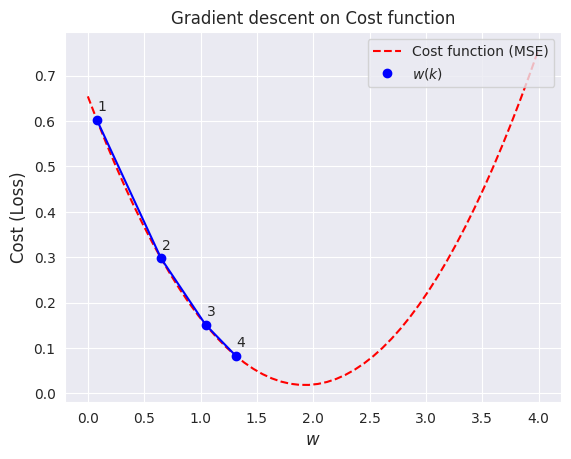

In [ ]:
plt.plot(ws, loss_ws, 'r--', label='Cost function (MSE)')   # Loss curve
for i in range(0, len(history_loss)-1):
  w1, c1 = history_loss[i]
  w2, c2 = history_loss[i+1]
  plt.plot(w1, c1, 'bo')
  plt.plot([w1, w2], [c1, c2], 'b-')
  plt.text(w1, c1+0.02, f'${i+1}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.02, f'${i+2}$')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Gradient descent on Cost function')
plt.legend(loc=1)
plt.show()

จะเห็นว่าค่า Loss ยังลงไม่สุด แสดงว่ากำหนดจำนวนการวนรอบ(no_of_iterations)น้อยไป

# (5.) จำนวนรอบการทำ Gradient Descent

In [ ]:
import numpy as np
import matplotlib.pyplot as plt   # Ploting library
import seaborn as sns
sns.set_style('darkgrid')   # Set seaborn plotting style
np.random.seed(seed=1)  # กำหนด seed ค่าสุ่ม
x = np.random.uniform(0, 1, 12)   # uniform distribution ค่าระหว่าง 0-1

# functiion f(x) = 2*x
def f(x):
  return (2*x) + 0

noise = 0.15    # ใส่ Noise (Variance of the gaussian noise)
noise = np.random.randn(x.shape[0]) * noise

y = f(x) + noise    # สร้าง y

In [ ]:
def neuron(x, w):
  # Output function ที่ออกจาก Neuron ตัวอย่างนี้ใช้ y = w*x + 0 (ให้ b = 0)
  return w*x + 0

def loss_mse(y_pred, y_true):
  return np.mean((y_true - y_pred)**2)

จากข้อที่4 ลองเพิ่มจำนวนรอบ no_of_iteration เป็น 20 ถึง 22 จะพบว่าค่า loss เริ่มนิ่ง

In [ ]:
# Gradient function
def gradient(w, x, y_true):
  y_pred = neuron(x, w)
  return 2 * x * (y_pred - y_true)

# Update function delta w
def delta_w(w_k, x, y, learning_rate):
  return learning_rate * np.mean(gradient(w_k, x, y))

w = .08 # ค่า weight เริ่มต้นที่กำหนดเอง
learning_rate = .9    # ค่า learning_rate

# *****
no_of_iterations = 22     # จำนวนรอบในการอัปเดต gradient descent
# *****

history_loss = [(w, loss_mse(neuron(x, w), y))]   # เก็บค่า track of weight, loss
for i in range(no_of_iterations):
  dw = delta_w(w, x, y, learning_rate)    # update ผลต่าง delta w
  w = w - dw # update current weight
  history_loss.append((w, loss_mse(neuron(x, w), y)))   # บันทึก weight และ loss

# Print แสดงค่า w และ loss
for i in range(0, len(history_loss)):
  print('{} -> w: {:.2f}\t loss: {}'.format(i, history_loss[i][0], history_loss[i][1]))

0 -> w: 0.08	 loss: 0.6026350889130302
1 -> w: 0.65	 loss: 0.2972873040173511
2 -> w: 1.04	 loss: 0.15157473984131506
3 -> w: 1.32	 loss: 0.08204041731132092
4 -> w: 1.50	 loss: 0.04885850168828629
5 -> w: 1.63	 loss: 0.0330240262184311
6 -> w: 1.72	 loss: 0.025467783346443618
7 -> w: 1.79	 loss: 0.02186192936983673
8 -> w: 1.83	 loss: 0.02014120875234395
9 -> w: 1.86	 loss: 0.019320077485611143
10 -> w: 1.88	 loss: 0.01892823202833484
11 -> w: 1.89	 loss: 0.018741242604586542
12 -> w: 1.90	 loss: 0.018652010883395336
13 -> w: 1.91	 loss: 0.018609429330347378
14 -> w: 1.91	 loss: 0.01858910932939065
15 -> w: 1.92	 loss: 0.018579412584924414
16 -> w: 1.92	 loss: 0.018574785279372428
17 -> w: 1.92	 loss: 0.018572577120051947
18 -> w: 1.92	 loss: 0.018571523382076387
19 -> w: 1.92	 loss: 0.018571020536239657
20 -> w: 1.92	 loss: 0.01857078057721628
21 -> w: 1.92	 loss: 0.01857066606829785
22 -> w: 1.92	 loss: 0.01857061142441651


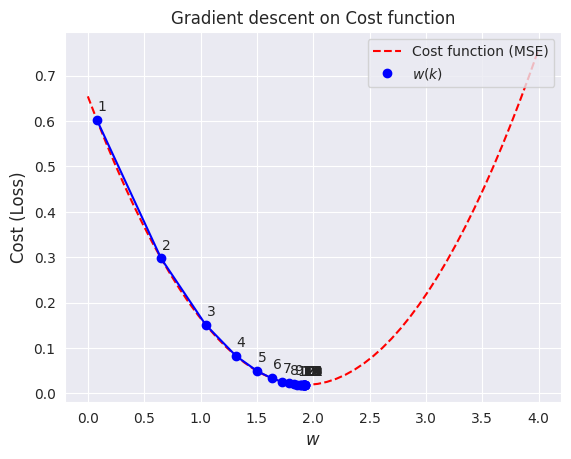

In [ ]:
plt.plot(ws, loss_ws, 'r--', label='Cost function (MSE)')   # Loss curve
for i in range(0, len(history_loss)-1):
  w1, c1 = history_loss[i]
  w2, c2 = history_loss[i+1]
  plt.plot(w1, c1, 'bo')
  plt.plot([w1, w2], [c1, c2], 'b-')
  plt.text(w1, c1+0.02, f'${i+1}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.02, f'${i+2}$')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Gradient descent on Cost function')
plt.legend(loc=1)
plt.show()

plot ดู Loss curve ประวัติค่า Loss ในแต่ละรอบ จะสังเกตเห็นว่ารอบที่ 6 ค่า Loss ลดลงจนเกือบไม่มีการลดอีกแล้ว ถือว่าได้ค่า w ที่ดีที่สุดแล้ว (Convergence)

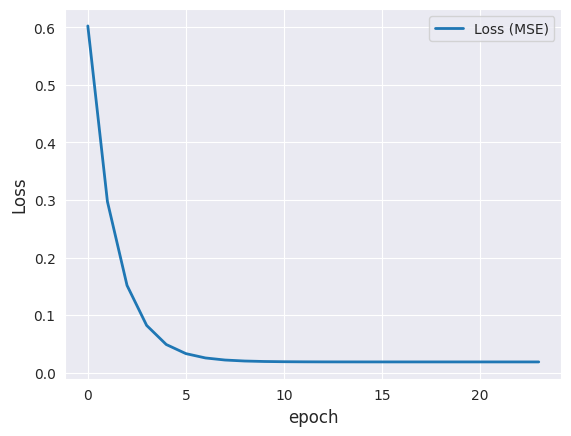

In [ ]:
epoch = np.linspace(0, len(history_loss), num=len(history_loss)).astype('int')
# epoch -> range(len(history_loss))
step_loss = [ls[1] for ls in history_loss]

plt.plot(epoch, step_loss, lw=2, label='Loss (MSE)')
plt.xlabel('epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.show()

**สรุป:** ได้ค่าที่ดีที่สุดคือ 1.92 ดังนั้นสมการ Model ของ NN คือ y = 1.92x + b (ใกล้เคียงกับ y=2x ตามที่สร้าง Dataset แต่ใส่ Noise ให้เพี้ยนๆไปบ้าง)

*Test: ลองเอา Noise ออกแล้วรันใหม่ทั้งหมด จะได้ w=2 พอดี*

# (6.) ความเร็วการเรียนรู้ Learning Rate

ใช้โค้ดต่อจากข้อ 5 เลย

โดยข้อนี้เราจะลดค่า Learning Rate ลง นั้นคือ อัตราขยับหรือการก้าวเดินน้อยลง(Small step หรือ w เปลี่ยนค่าทีละน้อยๆ)

In [ ]:
# Gradient function
def gradient(w, x, y_true):
  y_pred = neuron(x, w)
  return 2 * x * (y_pred - y_true)

# Update function delta w
def delta_w(w_k, x, y, learning_rate):
  return learning_rate * np.mean(gradient(w_k, x, y))

w = .08 # ค่า weight เริ่มต้นที่กำหนดเอง

# *****
learning_rate = .17    # ค่า learning_rate
# *****

no_of_iterations = 22     # จำนวนรอบในการอัปเดต gradient descent

history_loss = [(w, loss_mse(neuron(x, w), y))]   # เก็บค่า track of weight, loss
for i in range(no_of_iterations):
  dw = delta_w(w, x, y, learning_rate)    # update ผลต่าง delta w
  w = w - dw # update current weight
  history_loss.append((w, loss_mse(neuron(x, w), y)))   # บันทึก weight และ loss

# Print แสดงค่า w และ loss
for i in range(0, len(history_loss)):
  print('{} -> w: {:.2f}\t loss: {}'.format(i, history_loss[i][0], history_loss[i][1]))

0 -> w: 0.08	 loss: 0.6026350889130302
1 -> w: 0.19	 loss: 0.5364030490938435
2 -> w: 0.29	 loss: 0.47768162307342316
3 -> w: 0.38	 loss: 0.42561911853203654
4 -> w: 0.47	 loss: 0.3794604237793016
5 -> w: 0.56	 loss: 0.33853605565593475
6 -> w: 0.64	 loss: 0.3022524493869856
7 -> w: 0.71	 loss: 0.2700833495511243
8 -> w: 0.78	 loss: 0.24156217730107646
9 -> w: 0.85	 loss: 0.21627526312979242
10 -> w: 0.91	 loss: 0.19385584703076386
11 -> w: 0.97	 loss: 0.1739787590311466
12 -> w: 1.03	 loss: 0.15635570294443402
13 -> w: 1.08	 loss: 0.14073107493849074
14 -> w: 1.13	 loss: 0.1268782562716891
15 -> w: 1.18	 loss: 0.11459632642719647
16 -> w: 1.22	 loss: 0.10370714897289679
17 -> w: 1.26	 loss: 0.09405278788041761
18 -> w: 1.30	 loss: 0.0854932168296977
19 -> w: 1.34	 loss: 0.07790428827497464
20 -> w: 1.37	 loss: 0.07117593281563801
21 -> w: 1.40	 loss: 0.0652105627557222
22 -> w: 1.43	 loss: 0.059921656697354046


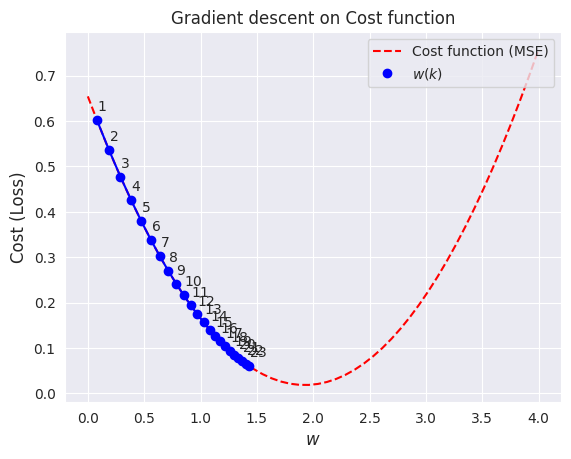

In [ ]:
plt.plot(ws, loss_ws, 'r--', label='Cost function (MSE)')   # Loss curve
for i in range(0, len(history_loss)-1):
  w1, c1 = history_loss[i]
  w2, c2 = history_loss[i+1]
  plt.plot(w1, c1, 'bo')
  plt.plot([w1, w2], [c1, c2], 'b-')
  plt.text(w1, c1+0.02, f'${i+1}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.02, f'${i+2}$')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Gradient descent on Cost function')
plt.legend(loc=1)
plt.show()

จากกราฟ จะเห็นว่ายังไม่ถึงจุดที่ดีที่สุด เพราะการปรับค่า weight ละเอียดขึ้น แก้โดยเพิ่ม no_of_iterations ซึ่งจะทำให้ train นานขึ้น

ลองเพิ่ม learning_rate ให้สูงขึ้นแล้ว run ใหม่ อาจจะเกิดปัญหาการข้ามจุดที่ดีที่สุดไป

# (7.) เริ่มต้นด้วยค่า weight ใดๆ

เปลี่ยนค่า weight เริ่มต้นเป็นค่าอื่นๆดู

In [ ]:
# Gradient function
def gradient(w, x, y_true):
  y_pred = neuron(x, w)
  return 2 * x * (y_pred - y_true)

# Update function delta w
def delta_w(w_k, x, y, learning_rate):
  return learning_rate * np.mean(gradient(w_k, x, y))

# *****
w = 3.7 # ค่า weight เริ่มต้นที่กำหนดเอง
# *****

learning_rate = .9    # ค่า learning_rate
no_of_iterations = 6     # จำนวนรอบในการอัปเดต gradient descent

history_loss = [(w, loss_mse(neuron(x, w), y))]   # เก็บค่า track of weight, loss
for i in range(no_of_iterations):
  dw = delta_w(w, x, y, learning_rate)    # update ผลต่าง delta w
  w = w - dw # update current weight
  history_loss.append((w, loss_mse(neuron(x, w), y)))   # บันทึก weight และ loss

# Print แสดงค่า w และ loss
for i in range(0, len(history_loss)):
  print('{} -> w: {:.2f}\t loss: {}'.format(i, history_loss[i][0], history_loss[i][1]))

0 -> w: 3.70	 loss: 0.5604310587397846
1 -> w: 3.15	 loss: 0.27714745771976795
2 -> w: 2.77	 loss: 0.14196396553314475
3 -> w: 2.51	 loss: 0.07745413688803532
4 -> w: 2.33	 loss: 0.0466699196399979
5 -> w: 2.20	 loss: 0.0319796305557126
6 -> w: 2.12	 loss: 0.02496939567979971


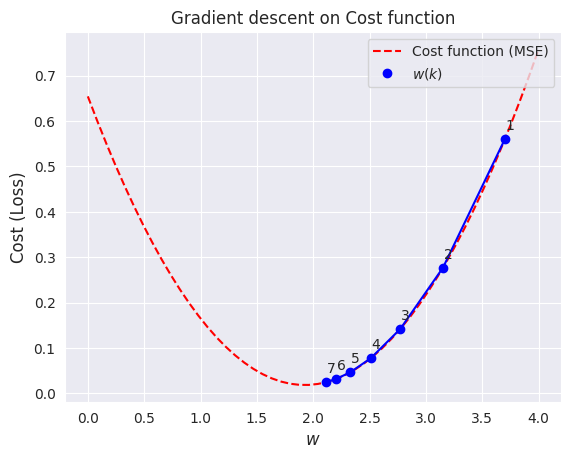

In [ ]:
plt.plot(ws, loss_ws, 'r--', label='Cost function (MSE)')   # Loss curve
for i in range(0, len(history_loss)-1):
  w1, c1 = history_loss[i]
  w2, c2 = history_loss[i+1]
  plt.plot(w1, c1, 'bo')
  plt.plot([w1, w2], [c1, c2], 'b-')
  plt.text(w1, c1+0.02, f'${i+1}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.02, f'${i+2}$')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Gradient descent on Cost function')
plt.legend(loc=1)
plt.show()

จากกราฟ จะเห็นว่าจุดเริ่มต้นอยู่ซีกขวาของกราฟแล้ว และไม่ว่าจะเริ่มต้นที่จุดใด ระบบ Gradient Descent จะคำนวณและวิ่งไปทางลาดลงให้อัตโนมัติ

# (8.) SGD มี Momentum

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

X, y = make_blobs(n_samples=1000,
                  centers=5,
                  n_features=2,
                  cluster_std=1.1,
                  random_state=1)
# สร้าง 1000 ข้อมูล 5 กลุ่ม แต่ละกลุ่มมี 2 Features
X_df = pd.DataFrame(X, columns=['weight', 'height'])
y_df = pd.DataFrame(y, columns=['class'])   # y (label)
df = pd.concat([X_df, y_df], axis=1)
target_map = {0:'house', 1:'bird', 2:'fish', 3:'cat', 4:'dog'}  # ใส่กลุ่มพันธุ์สัตว์
df['class'] = df['class'].map(target_map)

df.sample(5, random_state=100)

,weight,height,class
249,-11.889046,-3.890515,bird
353,-9.501477,-4.717762,bird
537,-3.277917,1.611778,dog
424,-9.297471,-2.403170,bird
564,-2.897847,0.377424,dog


In [2]:
class_names, y = np.unique(df['class'], return_inverse=True)
print(class_names)
print(y[:20])

['bird' 'cat' 'dog' 'fish' 'house']
[3 0 1 1 2 2 3 2 2 2 2 4 4 1 0 1 4 2 2 0]


In [3]:
X = df.drop('class', axis=1)
X.head()

,weight,height
0,-7.253467,-7.947597
1,-12.447536,-5.822616
2,-5.973586,-3.275877
3,-5.310976,-2.953204
4,-1.860408,1.477063


In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:4]

array([[-0.5595291 , -1.35408313],
       [-2.10518858, -0.87283448],
       [-0.17865988, -0.29606987],
       [ 0.0185207 , -0.22299352]])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X_sc, y, test_size=0.25,
                                                   random_state=1)    # สัดส่วน 25%
X_train.shape, X_test.shape

((750, 2), (250, 2))

ทำต่อจาก ข้อ3 ใช้เทคนิค optimizer ถ้าจะลองเปลี่ยนตัว optimizer ให้รันโค้ดนี้ เพื่อสร้างโมเดลใหม่

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()    # เริ่มสร้าง Model
model.add(Dense(100, activation='relu', input_shape=(2,)))   # Add layer
model.add(Dense(5, activation='softmax'))   # ใช้ Softmax สำหรับ classification

ทำการคอมไพล์ โดยกำหนดให้ใช้ Optimizer แบบ SGD กรณีไม่กำหนดค่าเพิ่มเติมใดๆ

In [7]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=50, batch_size=20,
                    verbose=1, validation_split=0.25) # validation แบ่ง 25%

Epoch 1/50
29/29 [==============================] - 1s 10ms/step - loss: 1.5739 - accuracy: 0.3843 - val_loss: 1.4703 - val_accuracy: 0.4255
Epoch 2/50
29/29 [==============================] - 0s 4ms/step - loss: 1.4464 - accuracy: 0.3950 - val_loss: 1.3652 - val_accuracy: 0.4255
Epoch 3/50
29/29 [==============================] - 0s 4ms/step - loss: 1.3417 - accuracy: 0.3968 - val_loss: 1.2789 - val_accuracy: 0.4255
Epoch 4/50
29/29 [==============================] - 0s 4ms/step - loss: 1.2571 - accuracy: 0.4306 - val_loss: 1.2013 - val_accuracy: 0.4628
Epoch 5/50
29/29 [==============================] - 0s 5ms/step - loss: 1.1837 - accuracy: 0.5356 - val_loss: 1.1394 - val_accuracy: 0.5957
Epoch 6/50
29/29 [==============================] - 0s 4ms/step - loss: 1.1230 - accuracy: 0.5907 - val_loss: 1.0859 - val_accuracy: 0.6277
Epoch 7/50
29/29 [==============================] - 0s 4ms/step - loss: 1.0694 - accuracy: 0.6335 - val_loss: 1.0388 - val_accuracy: 0.6436
Epoch 8/50
29/29 [=

กรณีต้องการกำหนดค่าพารามิเตอร์

In [11]:
import tensorflow as tf

opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=20,
                    verbose=1, validation_split=0.25) # validation แบ่ง 25%

Epoch 1/50
29/29 [==============================] - 1s 8ms/step - loss: 1.3704 - accuracy: 0.4662 - val_loss: 1.0606 - val_accuracy: 0.6596
Epoch 2/50
29/29 [==============================] - 0s 5ms/step - loss: 0.8597 - accuracy: 0.7171 - val_loss: 0.7286 - val_accuracy: 0.7872
Epoch 3/50
29/29 [==============================] - 0s 4ms/step - loss: 0.6259 - accuracy: 0.8452 - val_loss: 0.5602 - val_accuracy: 0.8511
Epoch 4/50
29/29 [==============================] - 0s 5ms/step - loss: 0.4987 - accuracy: 0.8772 - val_loss: 0.4533 - val_accuracy: 0.9043
Epoch 5/50
29/29 [==============================] - 0s 7ms/step - loss: 0.4170 - accuracy: 0.9039 - val_loss: 0.3845 - val_accuracy: 0.9202
Epoch 6/50
29/29 [==============================] - 0s 5ms/step - loss: 0.3561 - accuracy: 0.9288 - val_loss: 0.3364 - val_accuracy: 0.9149
Epoch 7/50
29/29 [==============================] - 0s 5ms/step - loss: 0.3143 - accuracy: 0.9359 - val_loss: 0.3014 - val_accuracy: 0.9255
Epoch 8/50
29/29 [==

ในจำนวน epoch เท่ากัน จะพบว่าแบบกำหนดค่าพารามิเตอร์มี Momentum ถึงจุดที่ดีที่สุด เร็วกว่าแบบแรก

ลอง optimizer อื่นๆดู

In [17]:
import tensorflow as tf

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='RMSProp',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=20,
                    verbose=1, validation_split=0.25) # validation แบ่ง 25%

Epoch 1/50
29/29 [==============================] - 1s 26ms/step - loss: 1.4414 - accuracy: 0.4769 - val_loss: 1.2513 - val_accuracy: 0.6383
Epoch 2/50
29/29 [==============================] - 0s 8ms/step - loss: 1.1513 - accuracy: 0.6637 - val_loss: 1.0336 - val_accuracy: 0.6809
Epoch 3/50
29/29 [==============================] - 0s 7ms/step - loss: 0.9508 - accuracy: 0.6975 - val_loss: 0.8718 - val_accuracy: 0.7074
Epoch 4/50
29/29 [==============================] - 0s 7ms/step - loss: 0.8072 - accuracy: 0.7206 - val_loss: 0.7515 - val_accuracy: 0.7500
Epoch 5/50
29/29 [==============================] - 0s 7ms/step - loss: 0.7024 - accuracy: 0.7705 - val_loss: 0.6633 - val_accuracy: 0.7500
Epoch 6/50
29/29 [==============================] - 0s 5ms/step - loss: 0.6172 - accuracy: 0.7954 - val_loss: 0.5872 - val_accuracy: 0.7926
Epoch 7/50
29/29 [==============================] - 0s 3ms/step - loss: 0.5472 - accuracy: 0.8363 - val_loss: 0.5216 - val_accuracy: 0.8351
Epoch 8/50
29/29 [=

# (9.) ไม่มี Regularization

ข้อนี้แสดง Model ที่เกิด Overfittimg ตรวจสอบด้วยกราฟ Loss, Accuracy และ เส้นขอบเขตของ Model ที่มีความพอดีกับข้อมูล Training set มาก แต่ไม่ดีกับ Test set

In [18]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

X, y = make_blobs(n_samples=300,
                  centers=5,
                  n_features=2,
                  cluster_std=1.5,
                  random_state=1)
# สร้าง 1000 ข้อมูล 5 กลุ่ม แต่ละกลุ่มมี 2 Features
X_df = pd.DataFrame(X, columns=['weight', 'height'])
y_df = pd.DataFrame(y, columns=['class'])   # y (label)
df = pd.concat([X_df, y_df], axis=1)
target_map = {0:'house', 1:'bird', 2:'fish', 3:'cat', 4:'dog'}  # ใส่กลุ่มพันธุ์สัตว์
df['class'] = df['class'].map(target_map)

df.sample(5, random_state=100)

,weight,height,class
222,0.251074,7.357142,house
139,-6.137073,-8.817986,fish
216,-2.910334,0.910864,dog
201,-10.462888,-7.605605,bird
249,-4.083457,-2.200076,cat


In [19]:
class_names, y = np.unique(df['class'], return_inverse=True)
print(class_names)
print(y[:20])

['bird' 'cat' 'dog' 'fish' 'house']
[1 2 3 4 0 4 4 0 1 2 4 2 4 2 1 1 2 2 0 1]


In [20]:
X = df.drop('class', axis=1)
X.head()

,weight,height
0,-3.068054,-4.267086
1,-4.162870,0.898986
2,-7.044853,-9.195268
3,-2.061392,5.202023
4,-11.676386,-1.019230


In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:4]

array([[ 0.66719181, -0.52421112],
       [ 0.3478834 ,  0.60685471],
       [-0.49266104, -1.60319287],
       [ 0.96078956,  1.54896643]])

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X_sc, y, test_size=0.25,
                                                   random_state=1)    # สัดส่วน 25%
X_train.shape, X_test.shape

((225, 2), (75, 2))

In [26]:
X_train[:5]

array([[-1.88749332,  0.34888033],
       [ 0.20763461,  0.59876041],
       [ 1.44502622,  1.6805763 ],
       [-0.60375451, -0.04469566],
       [-1.06469212,  0.13304473]])

เพื่อให้เกิด Overfitting จะสร้างให้ Model มีความซับซ้อนมากขึ้น โดยกำหนดจำนวน Hidden Layer 3 ชั้น แต่ละชั้นกำหนดจำนวน Node (Neuron) เท่ากับ 256->128->64->5 ดังนี้

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()    # เริ่มสร้าง Model
model.add(Dense(256, activation='relu', input_shape=(2,)))   # input 2 feature
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))   # ชั้น Output สำหรับ 5 class เหมือนเดิม

ทำการคอมไพล์และ Train โดยให้ใช้ X_test, y_test เป็น Validation Test

In [29]:
import tensorflow as tf

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=1000, batch_size=256,
                    verbose=0, validation_data=(X_test, y_test))

ประเมิน model

In [50]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.0992730855941772
Test accuracy: 0.8399999737739563


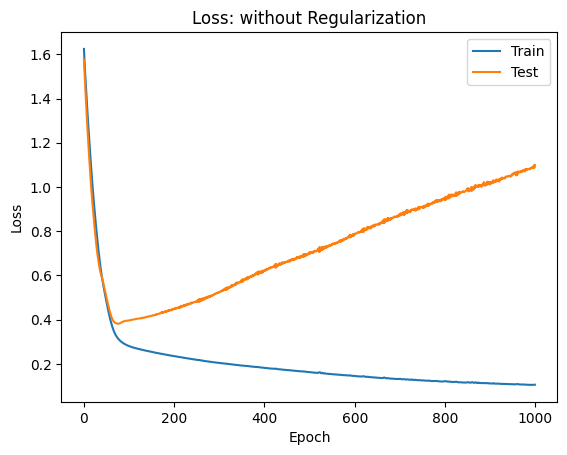

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss: without Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc=1)
plt.show()

จะเห็นเส้น Test Loss ลดลงแล้วเปลี่ยนแนวโน้มมากสูงขึ้น แสดงว่าเกิด Overfitting ทั้งนี้อาจเกิดจากการความซับซ้อนของ Model (Complexมากไป มีหลายชั้นและมีจำนวน Neuron มากเกินไป) หรือทำการ Train จำนวนรอบมากเกินไป

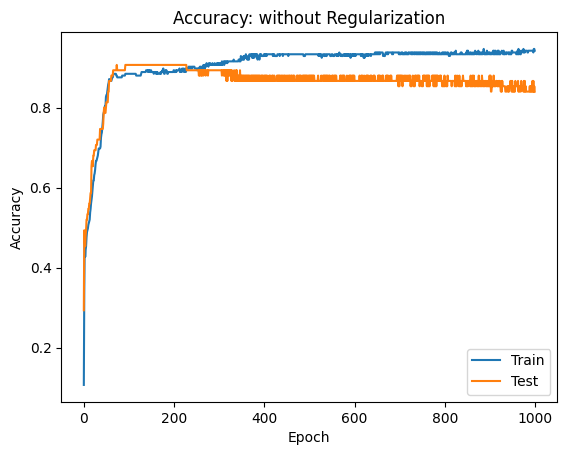

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy: without Regularization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc=4)
plt.show()

เส้น train วิ่งสูงขึ้นไปเรื่อยๆ ส่วนเส้น test วิ่งสูงสุดที่ประมาณ epoch 100 แล้วลดลงเรื่อย แสดงว่าเกิด overfitting ไม่เหมาะที่จะนำ Model ไปใช้

In [48]:
# คลาสสำหรับแปลง output ตาราง onehot ให้เป็น int
class Onehot2Int(object):
  def __init__(self, model):
    self.model = model
  def predict(self, X):
    y_pred = self.model.predict(X)
    return np.argmax(y_pred, axis=1)

model_no_ohe = Onehot2Int(model)

รันโค้ด Onehot ใหม่ด้วย ถ้ามีการปรับพารามิเตอร์ แล้วอยากดูกราฟการแบ่งขอบเขต

   33/22500 [..............................] - ETA: 35s  

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


22500/22500 [==============================] - 40s 2ms/step


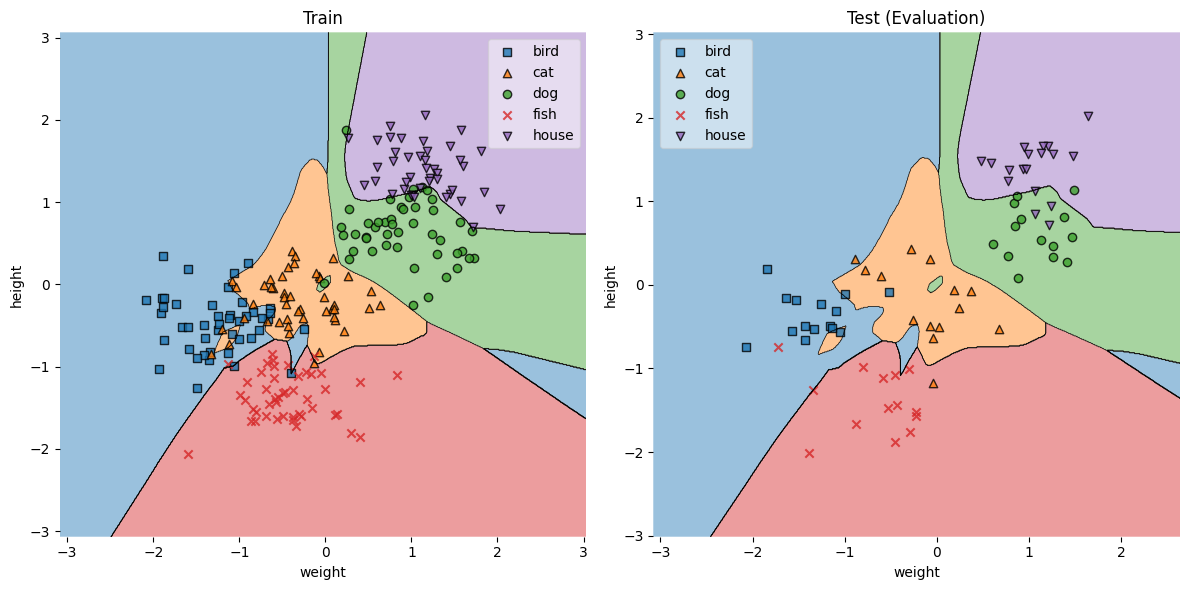

In [49]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Plot decision regions for test data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax = plot_decision_regions(X_train, y_train, clf=model_no_ohe, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)
plt.title('Train')
plt.xlabel('weight')
plt.ylabel('height')

# Plot decision regions for train data
plt.subplot(1, 2, 2)
ax = plot_decision_regions(X_test, y_test, clf=model_no_ohe, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)
plt.title('Test (Evaluation)')
plt.xlabel('weight')
plt.ylabel('height')

plt.tight_layout()
plt.show()

- รูปซ้าย: Model พยายามสร้างขอบเขตจำแนกให้ครอบคลุมข้อมูล Training set มากที่สุดเท่าที่จะทำได้ (ยิ่ง Hidden Layer และ Neuron จำนวนมากๆ จะสร้างโค้งคดเคี้ยวได้มาก) ทำให้ขอบเขตคดเคี้ยวเกินไป
- รูปขวา: เมื่อนำ Model ไปใช้งานจริงกับข้อมูลที่ไม่เคยเห็นมาก่อน(Test) ก็จะเห็นว่า พังครับ!!!

**สรุป:** Overfitting Model มีประสิทธิภาพความแม่นยำสูงกับตัว Train set แต่ใช้งานได้ไม่ดีกับข้อมูลอื่นๆ เช่น Test set

# (10.) Regularization L1

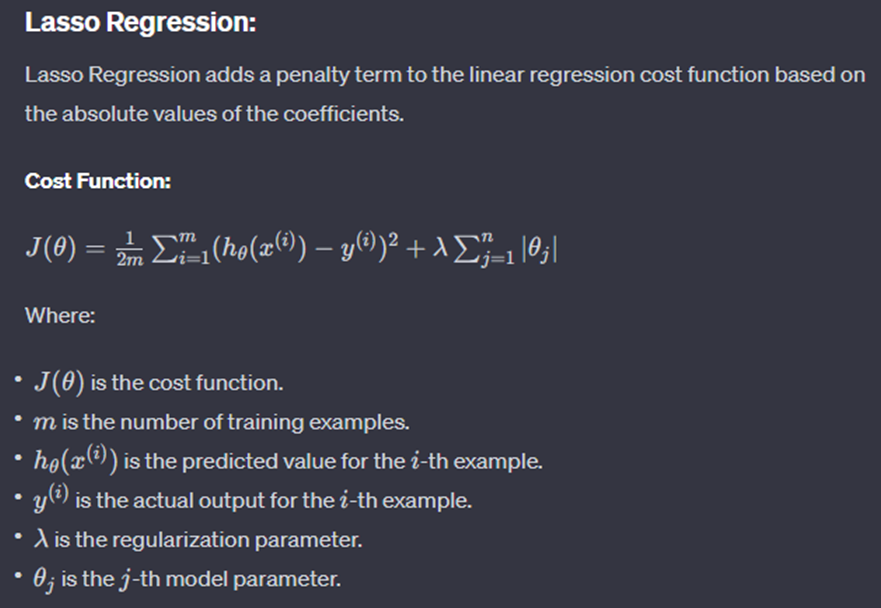

ลด overfitting โดยใช้ L1 ทำต่อจากข้อ 9

In [51]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2, l1_l2 # Regulaizers
import tensorflow as tf

model = Sequential()    # เริ่มสร้าง Model
model.add(Dense(256, activation='relu', kernel_regularizer=l1(0.001), input_shape=(2,)))
model.add(Dense(128, kernel_regularizer=l1(0.001), activation='relu'))
model.add(Dense(64, kernel_regularizer=l1(0.001), activation='relu'))
# 0.001 = regularization parameter
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=1000, batch_size=256,
                    verbose=0, validation_data=(X_test, y_test))

In [52]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6157196164131165
Test accuracy: 0.8933333158493042


จะเห็นว่ามีความแม่นยำมากกว่าแบบที่ไม่มี Regularization

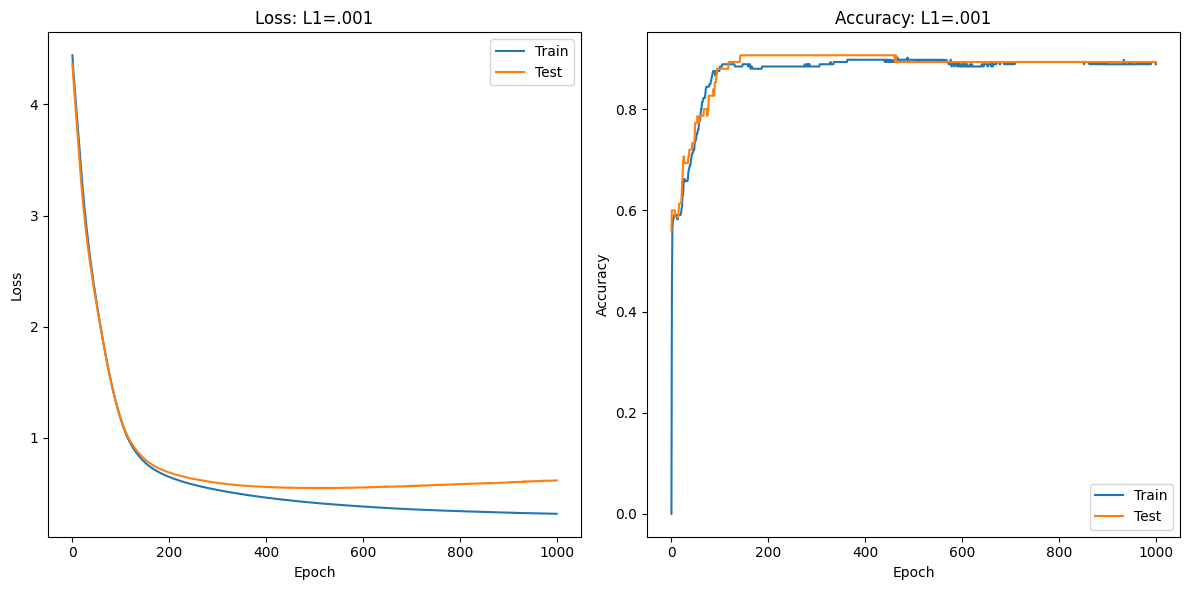

In [53]:
import matplotlib.pyplot as plt

# Plot loss and accuracy in subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot loss
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Loss: L1=.001')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(['Train', 'Test'], loc=1)

# Plot accuracy
axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Accuracy: L1=.001')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(['Train', 'Test'], loc=4)

plt.tight_layout()
plt.show()

- กราฟ Loss: เส้น Test Loss ลงแล้วไม่ยกสูงขึ้น แสดงว่าแก้ปัญหาการเกิด Overfitting แล้ว
- กราฟ Accuracy: เส้น Test Accuracy ขึ้นไปแล้วตกลงมาเล็กน้อยเมื่อเทียบกับข้อ9 ถือว่าดีมาก

In [55]:
# คลาสสำหรับแปลง output ตาราง onehot ให้เป็น int
class Onehot2Int(object):
  def __init__(self, model):
    self.model = model
  def predict(self, X):
    y_pred = self.model.predict(X)
    return np.argmax(y_pred, axis=1)

model_no_ohe = Onehot2Int(model)

รันโค้ด Onehot ใหม่ด้วย ถ้ามีการปรับพารามิเตอร์ แล้วอยากดูกราฟการแบ่งขอบเขต

22500/22500 [==============================] - 59s 3ms/step


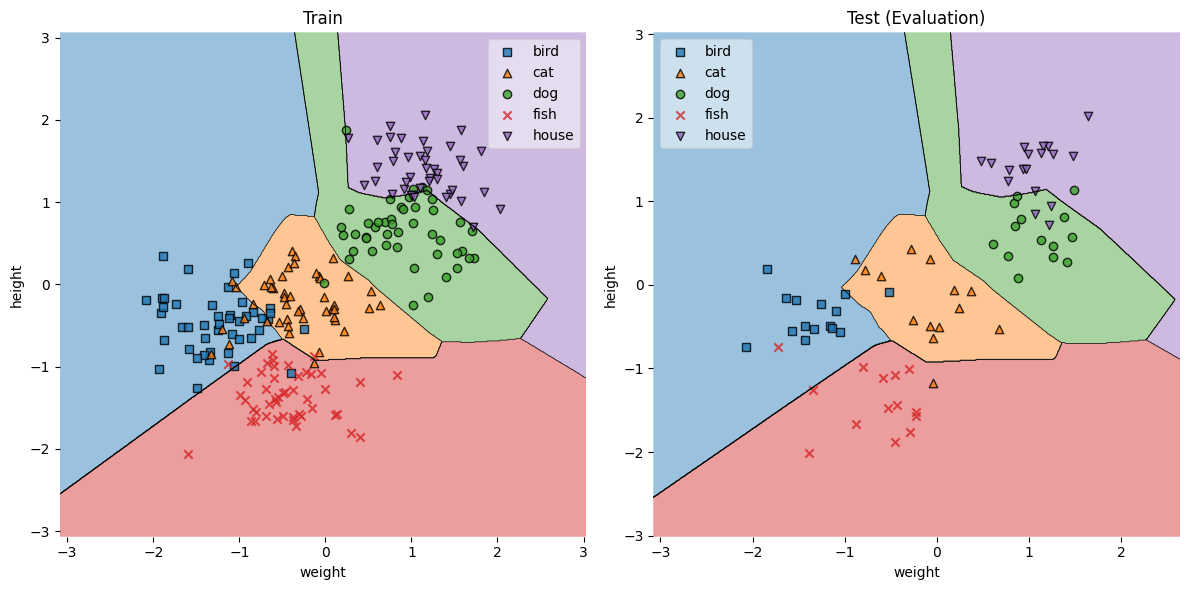

In [56]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Plot decision regions for test data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax = plot_decision_regions(X_train, y_train, clf=model_no_ohe, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)
plt.title('Train')
plt.xlabel('weight')
plt.ylabel('height')

# Plot decision regions for train data
plt.subplot(1, 2, 2)
ax = plot_decision_regions(X_test, y_test, clf=model_no_ohe, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)
plt.title('Test (Evaluation)')
plt.xlabel('weight')
plt.ylabel('height')

plt.tight_layout()
plt.show()

จะเห็นว่าเส้นแบ่งขอบเขตไม่เข้าไปตามจุดข้อมูล Train set มากเกินไป (มีความเป็น Generalization มากขึ้น)

# (11.) Regularization L2

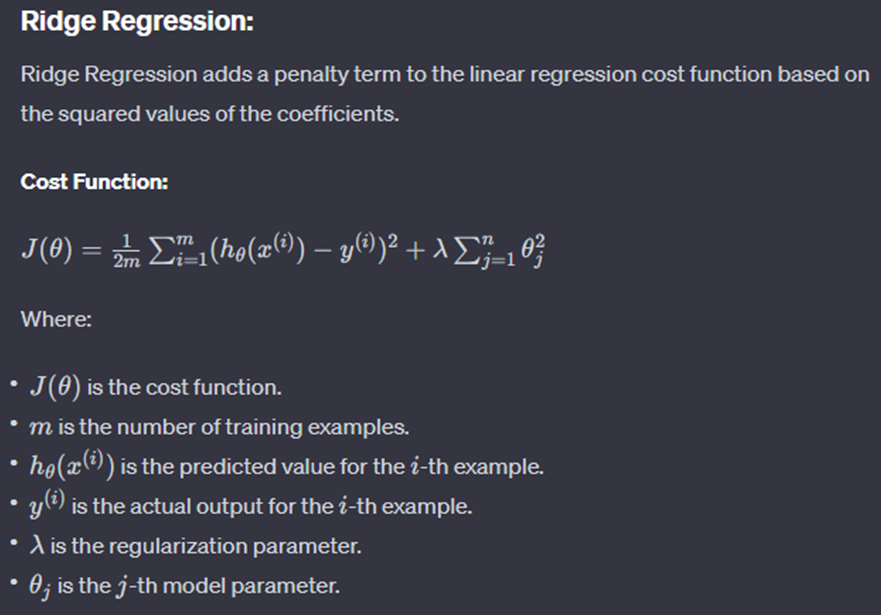

ใช้ L2 เพื่อเปรียบเทียบกับ L1 ทำเหมือนข้อ 10 ทำต่อจากข้อ 9

## L2 = 0.001

In [57]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2, l1_l2 # Regulaizers
import tensorflow as tf

model = Sequential()    # เริ่มสร้าง Model
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001), input_shape=(2,)))
model.add(Dense(128, kernel_regularizer=l2(0.001), activation='relu'))
model.add(Dense(64, kernel_regularizer=l2(0.001), activation='relu'))

model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=1000, batch_size=256,
                    verbose=0, validation_data=(X_test, y_test))

In [58]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.7046312689781189
Test accuracy: 0.8799999952316284


ได้ค่าความแม่นยำนอยกว่าแบบ L1 เล็กน้อย แต่ก็ดีกว่าแบบไม่มี Regularization

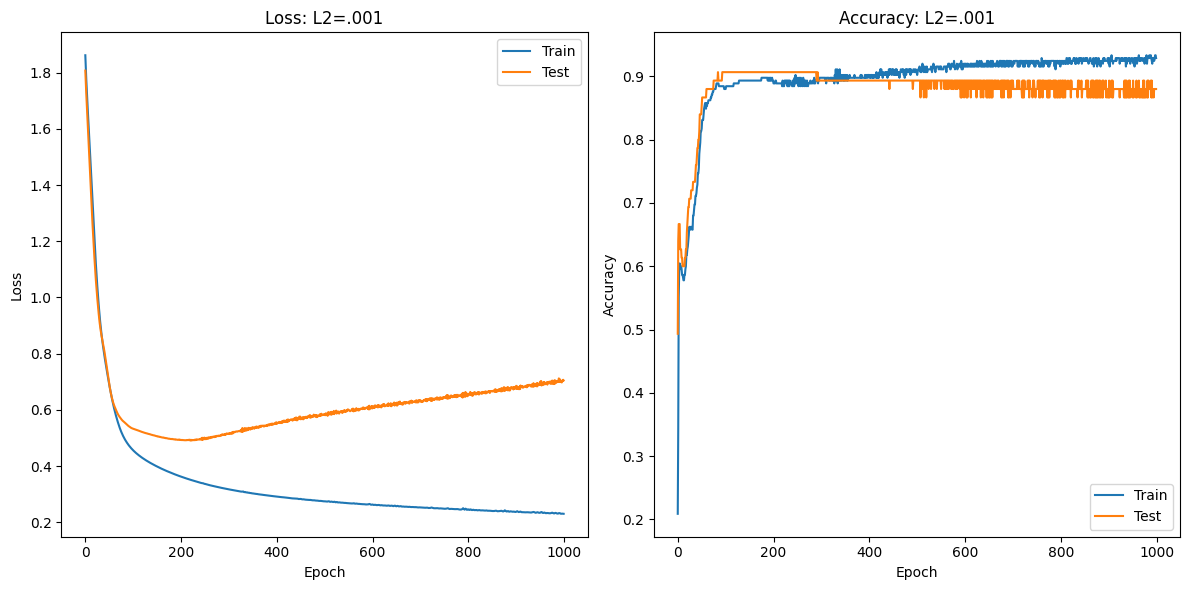

In [59]:
import matplotlib.pyplot as plt

# Plot loss and accuracy in subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot loss
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Loss: L2=.001')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(['Train', 'Test'], loc=1)

# Plot accuracy
axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Accuracy: L2=.001')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(['Train', 'Test'], loc=4)

plt.tight_layout()
plt.show()

- กราฟ Loss: เส้น Test Loss ลงแล้วยกสูงขึ้นเล็กน้อย แสดงว่ายังมี Overfitting อยู่บ้าง
- กราฟ Accuracy: เส้น Test Accuracy ขึ้นไปแล้วตกลงมาเล็กน้อย

## L2 = 0.01

In [60]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2, l1_l2 # Regulaizers
import tensorflow as tf

model = Sequential()    # เริ่มสร้าง Model
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_shape=(2,)))
model.add(Dense(128, kernel_regularizer=l2(0.01), activation='relu'))
model.add(Dense(64, kernel_regularizer=l2(0.01), activation='relu'))

model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=1000, batch_size=256,
                    verbose=0, validation_data=(X_test, y_test))

In [61]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.477872759103775
Test accuracy: 0.9066666960716248


ได้ค่าความแม่นยำสูงกว่า L1 และ L2=0.001

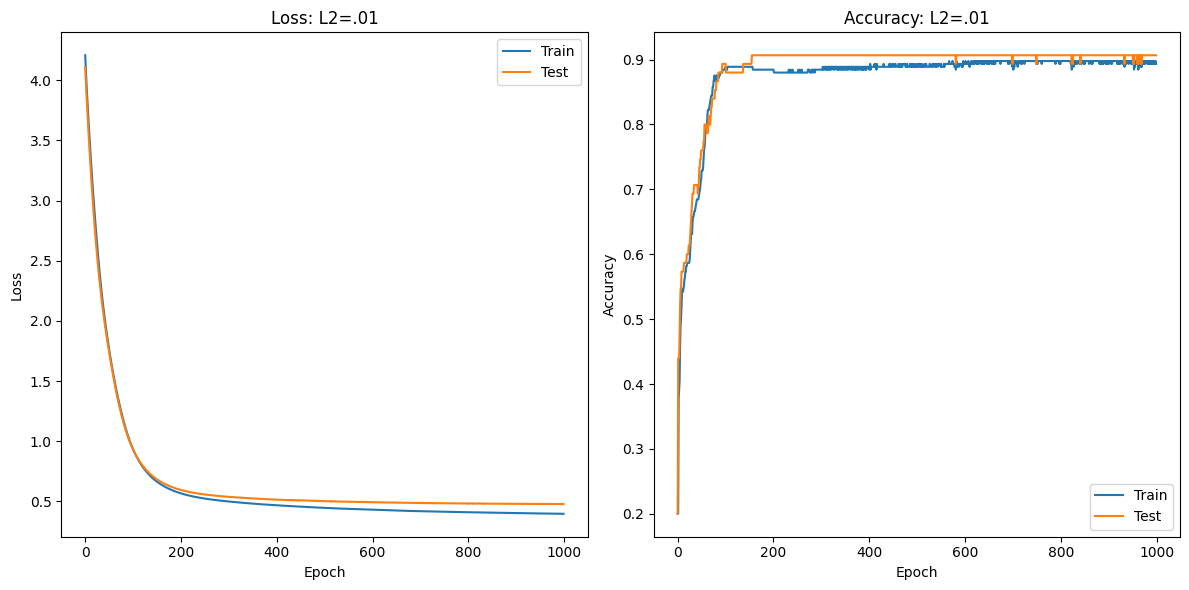

In [62]:
import matplotlib.pyplot as plt

# Plot loss and accuracy in subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot loss
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Loss: L2=.01')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(['Train', 'Test'], loc=1)

# Plot accuracy
axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Accuracy: L2=.01')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(['Train', 'Test'], loc=4)

plt.tight_layout()
plt.show()

- กราฟ Loss: เส้น Test Loss ลงแล้วไม่ยกสูงขึ้น แสดงว่า L2=0.01 แก้ Overfitting ได้ดีกว่า L2=0.001
- กราฟ Accuracy: เส้น Test Accuracy สูงขึ้นแล้วแทบไม่ลดลง ซึ่งดีกว่า L2=0.001 ก่อนหน้านี้

## L2 = 0.1

In [63]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2, l1_l2 # Regulaizers
import tensorflow as tf

model = Sequential()    # เริ่มสร้าง Model
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.1), input_shape=(2,)))
model.add(Dense(128, kernel_regularizer=l2(0.1), activation='relu'))
model.add(Dense(64, kernel_regularizer=l2(0.1), activation='relu'))

model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=1000, batch_size=256,
                    verbose=0, validation_data=(X_test, y_test))

In [64]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.8518070578575134
Test accuracy: 0.8399999737739563


ได้ค่าความแม่นยำน้อยกว่า L1 และ L2 ก่อนหน้านี้

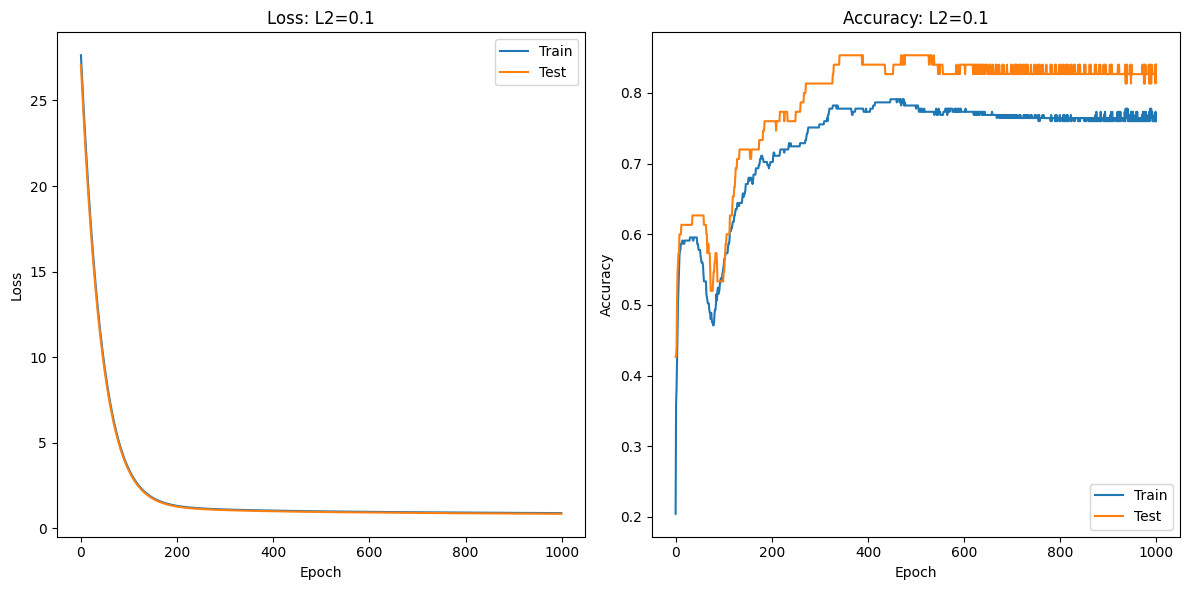

In [66]:
import matplotlib.pyplot as plt

# Plot loss and accuracy in subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot loss
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Loss: L2=0.1')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(['Train', 'Test'], loc=1)

# Plot accuracy
axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Accuracy: L2=0.1')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(['Train', 'Test'], loc=4)

plt.tight_layout()
plt.show()

- กราฟ Loss: เส้น Test Loss ดูเหมือนจะดึงลงแล้วไม่ยกสูงขึ้น แต่ถ้าพิจารณาควบคู่ค่า Loss จะยังสูงกว่า L1 และ L2 ก่อนหน้านี้
- กราฟ Accuracy: เส้น Test Accuracy สูงขึ้นแล้วไม่ลดลงมากนัก ไม่มี Overfitting แต่ถ้าพิจารณาควบคู่ค่า Accuracy จะยังไม่ดีเท่า L2=0.01

# (12.) Dropout
ทำต่อจากข้อ 9 และ 11 ทำร่วมกับการ Dropout

ตัวอย่างนี้ต้องการให้สุ่มหยุด Neuron 40%

In [67]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2 # Regulaizers
import tensorflow as tf

model = Sequential()    # เริ่มสร้าง Model
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_shape=(2,)))
model.add(Dropout(.4))
model.add(Dense(128, kernel_regularizer=l2(0.01), activation='relu'))
model.add(Dropout(.4))
model.add(Dense(64, kernel_regularizer=l2(0.01), activation='relu'))
model.add(Dropout(.4))

model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=1000, batch_size=256,
                    verbose=0, validation_data=(X_test, y_test))

In [68]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5356822609901428
Test accuracy: 0.8933333158493042


ค่าความแม่นยำใกล้เคียงกับ L2=0.01 แบบที่ไม่ใส่ Dropout

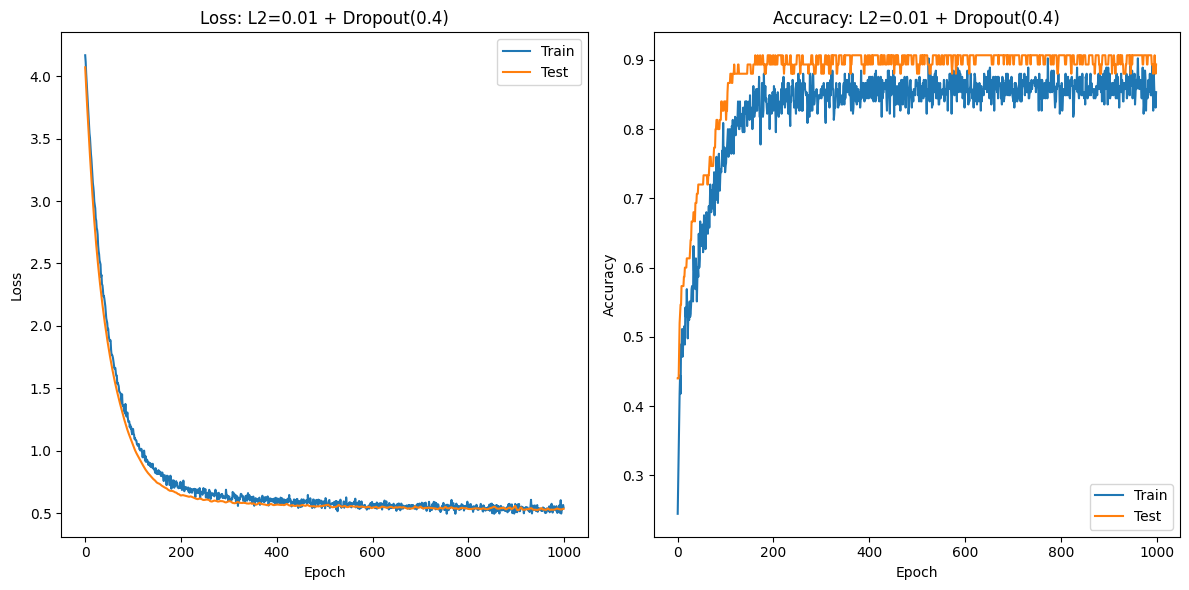

In [69]:
import matplotlib.pyplot as plt

# Plot loss and accuracy in subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot loss
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Loss: L2=0.01 + Dropout(0.4)')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(['Train', 'Test'], loc=1)

# Plot accuracy
axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Accuracy: L2=0.01 + Dropout(0.4)')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(['Train', 'Test'], loc=4)

plt.tight_layout()
plt.show()

ไม่เกิด Overfitting เมื่อเทียบกับ L2=0.01 แบบไม่มี Dropout จะพบว่าการมี Dropout ดีกว่าเล็กน้อย (แต่ไม่เสมอไป)

# (13.) Early Stopping
ทำต่อจากข้อ 9 โดยใช้ EarlyStopping เพื่อหยุดการทำงานของโมเดล เมื่อมีค่า val_loss สูงขึ้นในช่วงที่กำลัง train

In [70]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', verbose=1, patience=20)

model = Sequential()    # เริ่มสร้าง Model
model.add(Dense(256, activation='relu', input_shape=(2,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=1000, batch_size=256,
                    verbose=0, validation_data=(X_test, y_test),
                    callbacks=[es])   # กำหนด callbacks

Epoch 95: early stopping


ระบบจะทำการ train และแจ้งหยุดที่ epoch หนึ่งๆ
ตัวอย่างนี้หยุดที่่ epoch 95

In [72]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)
print("Train accuracy:", train_score[0])
print("Test accuracy:", test_score[1])

Train accuracy: 0.2840052545070648
Test accuracy: 0.9066666960716248


กรณีที่ไม่ได้ใช้ Early Stopping ระบบจะสั่ง Train ให้ครบตามจำนวน epochs ซึ่งยิ่ง Train ก้ยิ่งแย่ลง(เกิด Overfitting) ส่วนกรณีใช้ Early Stopping จะมีการดักจับ เมื่อพบว่า Train แล้วค่าผลลัพธ์ประสิทธิภาพ(Performance) แย่ลง จะทำการหยุดทันที

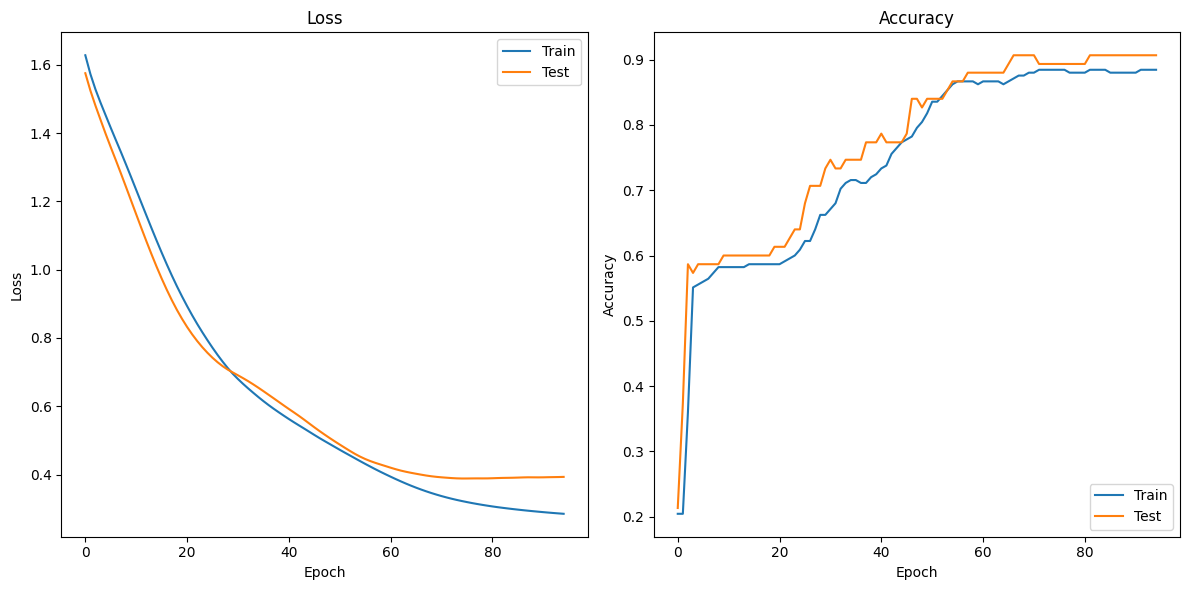

In [73]:
import matplotlib.pyplot as plt

# Plot loss and accuracy in subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot loss
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(['Train', 'Test'], loc=1)

# Plot accuracy
axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(['Train', 'Test'], loc=4)

plt.tight_layout()
plt.show()

จะหยุดที่รอบ 97 ก่อนเกิด Overfitting

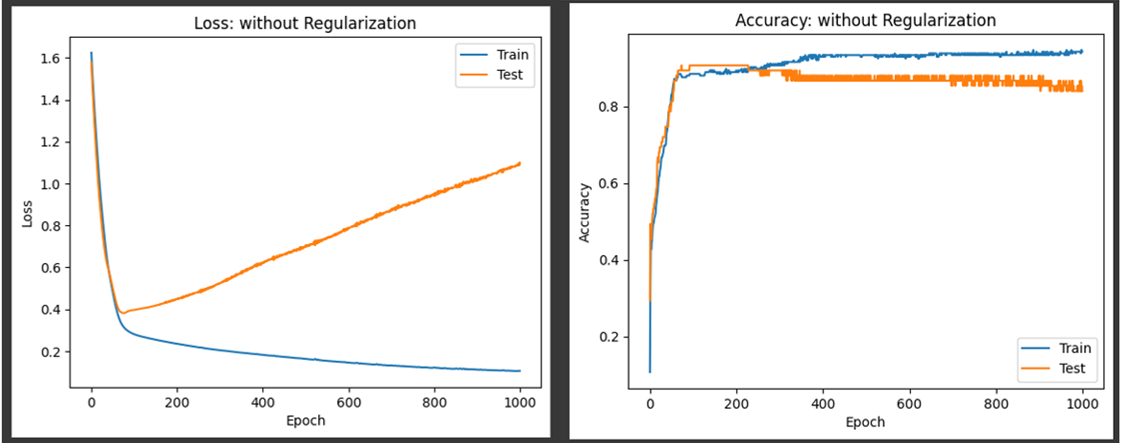
เมื่อเทียบกับข้อ 9

# (14.) Model Checkpoint
ทำร่วมกับข้อ 9, 13

ใช้งาน Model Checkpoint เก็บ Model เป็นไฟล์ .h5 อัตโนมัติ

In [74]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', verbose=1, patience=20)
# สร้าง Model Checkpoint
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1,
                     save_best_only=True)

model = Sequential()    # เริ่มสร้าง Model
model.add(Dense(256, activation='relu', input_shape=(2,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=1000, batch_size=256,
                    verbose=0, validation_data=(X_test, y_test),
                    callbacks=[es, mc])   # กำหนด callbacks


Epoch 1: val_accuracy improved from -inf to 0.29333, saving model to best_model.h5

Epoch 2: val_accuracy improved from 0.29333 to 0.45333, saving model to best_model.h5

Epoch 3: val_accuracy improved from 0.45333 to 0.61333, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_accuracy improved from 0.61333 to 0.64000, saving model to best_model.h5

Epoch 5: val_accuracy did not improve from 0.64000

Epoch 6: val_accuracy did not improve from 0.64000

Epoch 7: val_accuracy did not improve from 0.64000

Epoch 8: val_accuracy did not improve from 0.64000

Epoch 9: val_accuracy did not improve from 0.64000

Epoch 10: val_accuracy did not improve from 0.64000

Epoch 11: val_accuracy did not improve from 0.64000

Epoch 12: val_accuracy did not improve from 0.64000

Epoch 13: val_accuracy did not improve from 0.64000

Epoch 14: val_accuracy did not improve from 0.64000

Epoch 15: val_accuracy did not improve from 0.64000

Epoch 16: val_accuracy did not improve from 0.64000

Epoch 17: val_accuracy did not improve from 0.64000

Epoch 18: val_accuracy improved from 0.64000 to 0.65333, saving model to best_model.h5

Epoch 19: val_accuracy did not improve from 0.65333

Epoch 20: val_accuracy improved from 0.65333 to 0.69333, saving model to best_model.h5


ขณะ Train เครื่องจะทำการบันทึก Model เป็นไฟล์.h5(save model) ให้เป้นระยะๆจนสุดท้ายเมื่อเครื่องหยุด Train ก็จะได้ Model ที่ดีที่สุด
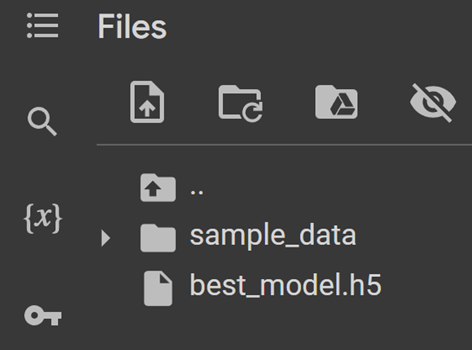